In [14]:
from PIL import Image
from keras.preprocessing import image
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
import sklearn 
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import os
from sklearn.metrics import mean_squared_error as mse


Automatically created module for IPython interactive environment


In [2]:
 size = 28, 28


In [9]:
imgdir = 'Newfolder/class1'
img_list=[]
Y=[]
imglst = [os.path.join(imgdir, x) for x in os.listdir(imgdir)]
for fn in imglst:
    img=Image.open(fn).convert('L')
    img.thumbnail(size, Image.ANTIALIAS)
    img = (image.img_to_array(img) - 127.5) / 127.5
    img_list.append(np.array(img).T.flatten())
    Y.append(1)

In [11]:
imgdir2 = 'Newfolder/class2'

imglst2 = [os.path.join(imgdir2, x) for x in os.listdir(imgdir2)]
for fn2 in imglst2:
    img2=Image.open(fn2).convert('L')
    img2.thumbnail(size, Image.ANTIALIAS)
    img2 = (image.img_to_array(img2) - 127.5) / 127.5
    img_list.append(np.array(img2).T.flatten())
    Y.append(0)

In [12]:
img_list = np.asarray(img_list)
X_train, X_test, y_train, y_test = train_test_split(
    img_list, Y, test_size=0.25, random_state=47)  


In [15]:
for i in range(3,6):
    n_components = 200
    pca = PCA(n_components=i).fit(X_train)
#     eigenfaces = pca.components_.reshape((n_components,50 , i))
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf = sklearn.ensemble.AdaBoostRegressor(DecisionTreeRegressor(),n_estimators = 1000)

    clf.fit(X_train_pca,y_train)
    y_pred = clf.predict(X_test_pca)
    print(mse(y_test,y_pred))

0.131578947368
0.131578947368
0.105263157895


In [16]:
sum(abs(y_pred-np.array(y_test)))

4.0

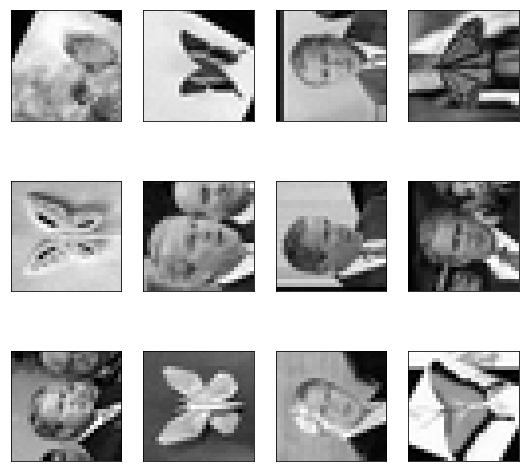

In [47]:
def plot_gallery(images, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
#         plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
plot_gallery(X_test,size[0],size[1])
plt.show()

In [93]:
imgdir = 'Newfolder/class1'
test=[]
name=[]
imglst = [os.path.join(imgdir, x) for x in os.listdir(imgdir)]
for fn in imglst:
    img3=Image.open(fn)
    name.append(img3.filename)
    img3= img3.convert('L')
    img3.thumbnail(size, Image.ANTIALIAS)
    img3 = (image.img_to_array(img3) - 127.5) / 127.5
    test.append(np.array(img3).T.flatten())
test_pca = pca.transform(test)
y_pred_out = clf.predict(test_pca)

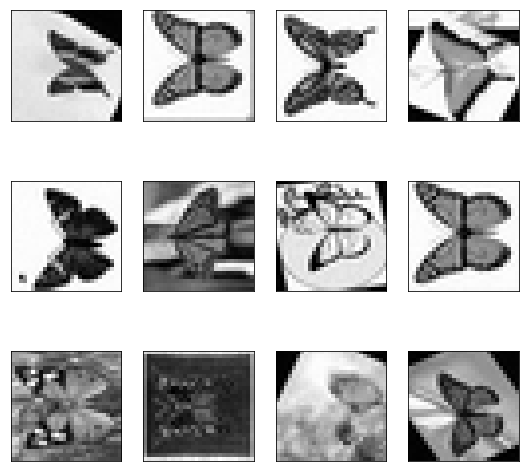

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.])

In [66]:
plot_gallery(test,size[0],size[1])
plt.show()
y_pred_out

In [76]:
y_pred_out.tofile('foo.csv',sep='\n',format='%10.5f')

In [97]:
k = y_pred_out.tolist()
final =[]
for x in range(len(name)):
    final.append([name[x],k[x]])
#     final.append(name[x])

In [103]:
final = np.asarray(final)
final.tofile('foo2.csv',sep='\n')

In [109]:
import xlsxwriter
workbook = xlsxwriter.Workbook('demo.xlsx')
worksheet = workbook.add_worksheet()

count = 0
for i in final:
    worksheet.write(count, 2, i[0])
    count += 1

array([['Newfolder/class1/aaa192111.jpg', '0.0'],
       ['Newfolder/class1/aaa179916.jpg', '1.0'],
       ['Newfolder/class1/aaa161818.jpg', '1.0'],
       ['Newfolder/class1/aaa165224.jpg', '1.0'],
       ['Newfolder/class1/aaa108273.jpg', '1.0'],
       ['Newfolder/class1/aaa111696.jpg', '1.0'],
       ['Newfolder/class1/aaa113169.jpg', '1.0'],
       ['Newfolder/class1/aaa197861.jpg', '1.0'],
       ['Newfolder/class1/aaa154522.jpg', '1.0'],
       ['Newfolder/class1/aaa125200.jpg', '1.0'],
       ['Newfolder/class1/aaa157692.jpg', '1.0'],
       ['Newfolder/class1/aaa133345.jpg', '1.0'],
       ['Newfolder/class1/aaa140877.jpg', '1.0'],
       ['Newfolder/class1/aaa135287.jpg', '1.0'],
       ['Newfolder/class1/aaa135956.jpg', '1.0'],
       ['Newfolder/class1/aaa126386.jpg', '1.0'],
       ['Newfolder/class1/aaa193499.jpg', '1.0'],
       ['Newfolder/class1/aaa164178.jpg', '1.0'],
       ['Newfolder/class1/aaa107432.jpg', '1.0'],
       ['Newfolder/class1/aaa110137.jpg', '1.0'],
